In [1]:
from PyPESTO.FRP import create_Lynd_v1
from PyPESTO.FRP.petab_ import plot_measurements
import numpy as np
%load_ext autoreload
%autoreload 2

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [2]:
sbml_model = create_Lynd_v1.load_sbml_model()

Creating SBML model (Lynd v1)
Creating species.
Generating parameters.
Creating reactions


In [3]:
data_dir = '/SBML/PyPESTO/COMP/lynd_raw_data/'
data, metadata = create_Lynd_v1.get_plga_data(data_dir)#, indices=[0])
create_Lynd_v1.write_petab_files(data, metadata, create_Lynd_v1.sbml_model_filepath())

Visualization table not available. Skipping.


hi
/SBML/PyPESTO/FRP/Lynd_v1


'/SBML/PyPESTO/FRP/Lynd_v1/Lynd_v1.yaml'

In [4]:
import logging

import numpy as np
import petab
import amici
import amici.plotting
import sys
import os
import importlib

import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

# log diagnostics
logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

# import to petab
yaml_filepath = '/SBML/PyPESTO/FRP/Lynd_v1/Lynd_v1.yaml'
petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
# importer = pypesto.petab.PetabImporter(petab_problem, model_name=create_FRP_v1.MODEL_NAME)

importer = pypesto.petab.PetabImporter.from_yaml(
    yaml_filepath,
    model_name=create_Lynd_v1.MODEL_NAME,
)

# Works when it runs twice for some reason
try:
    problem = importer.create_problem(force_compile=True)
except:
    problem = importer.create_problem(force_compile=True)

Visualization table not available. Skipping.
Compiling amici model to folder /SBML/amici_models/0.26.1/Lynd_v1.
2024-12-03 09:35:54.714 - amici.petab.sbml_import - INFO - Importing model ...
2024-12-03 09:35:54.715 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.
2024-12-03 09:35:54.735 - amici.petab.sbml_import - INFO - Model name is 'Lynd_v1'.
Writing model code to '/SBML/amici_models/0.26.1/Lynd_v1'.
2024-12-03 09:35:54.736 - amici.petab.sbml_import - INFO - Species: 11
2024-12-03 09:35:54.736 - amici.petab.sbml_import - INFO - Global parameters: 23
2024-12-03 09:35:54.736 - amici.petab.sbml_import - INFO - Reactions: 22
2024-12-03 09:35:54.749 - amici.petab.sbml_import - INFO - Observables: 2
2024-12-03 09:35:54.750 - amici.petab.sbml_import - INFO - Sigmas: 2
2024-12-03 09:35:54.751 - amici.petab.sbml_import - DEBUG - Adding output parameters to model: []
2024-12-03 09:35:54.753 - amici.petab.sbml_import - DEBUG - Adding 

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

In [5]:
optimizer = optimize.ScipyOptimizer(method='Nelder-Mead')

# engine
# In this notebook, it is faster to use a single core engine, due to the
# overhead of multiprocessing. But in general with more expensive problems
# it is recommended to use the MultiProcessEngine.
engine = pypesto.engine.MultiProcessEngine()
# starts
n_starts = 1000

# run optimization of problem 1
result1 = optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=n_starts, engine=engine
)

Engine will use up to 8 processes (= CPU count).
100%|███████████████████████████████████████| 1000/1000 [06:09<00:00,  2.71it/s]


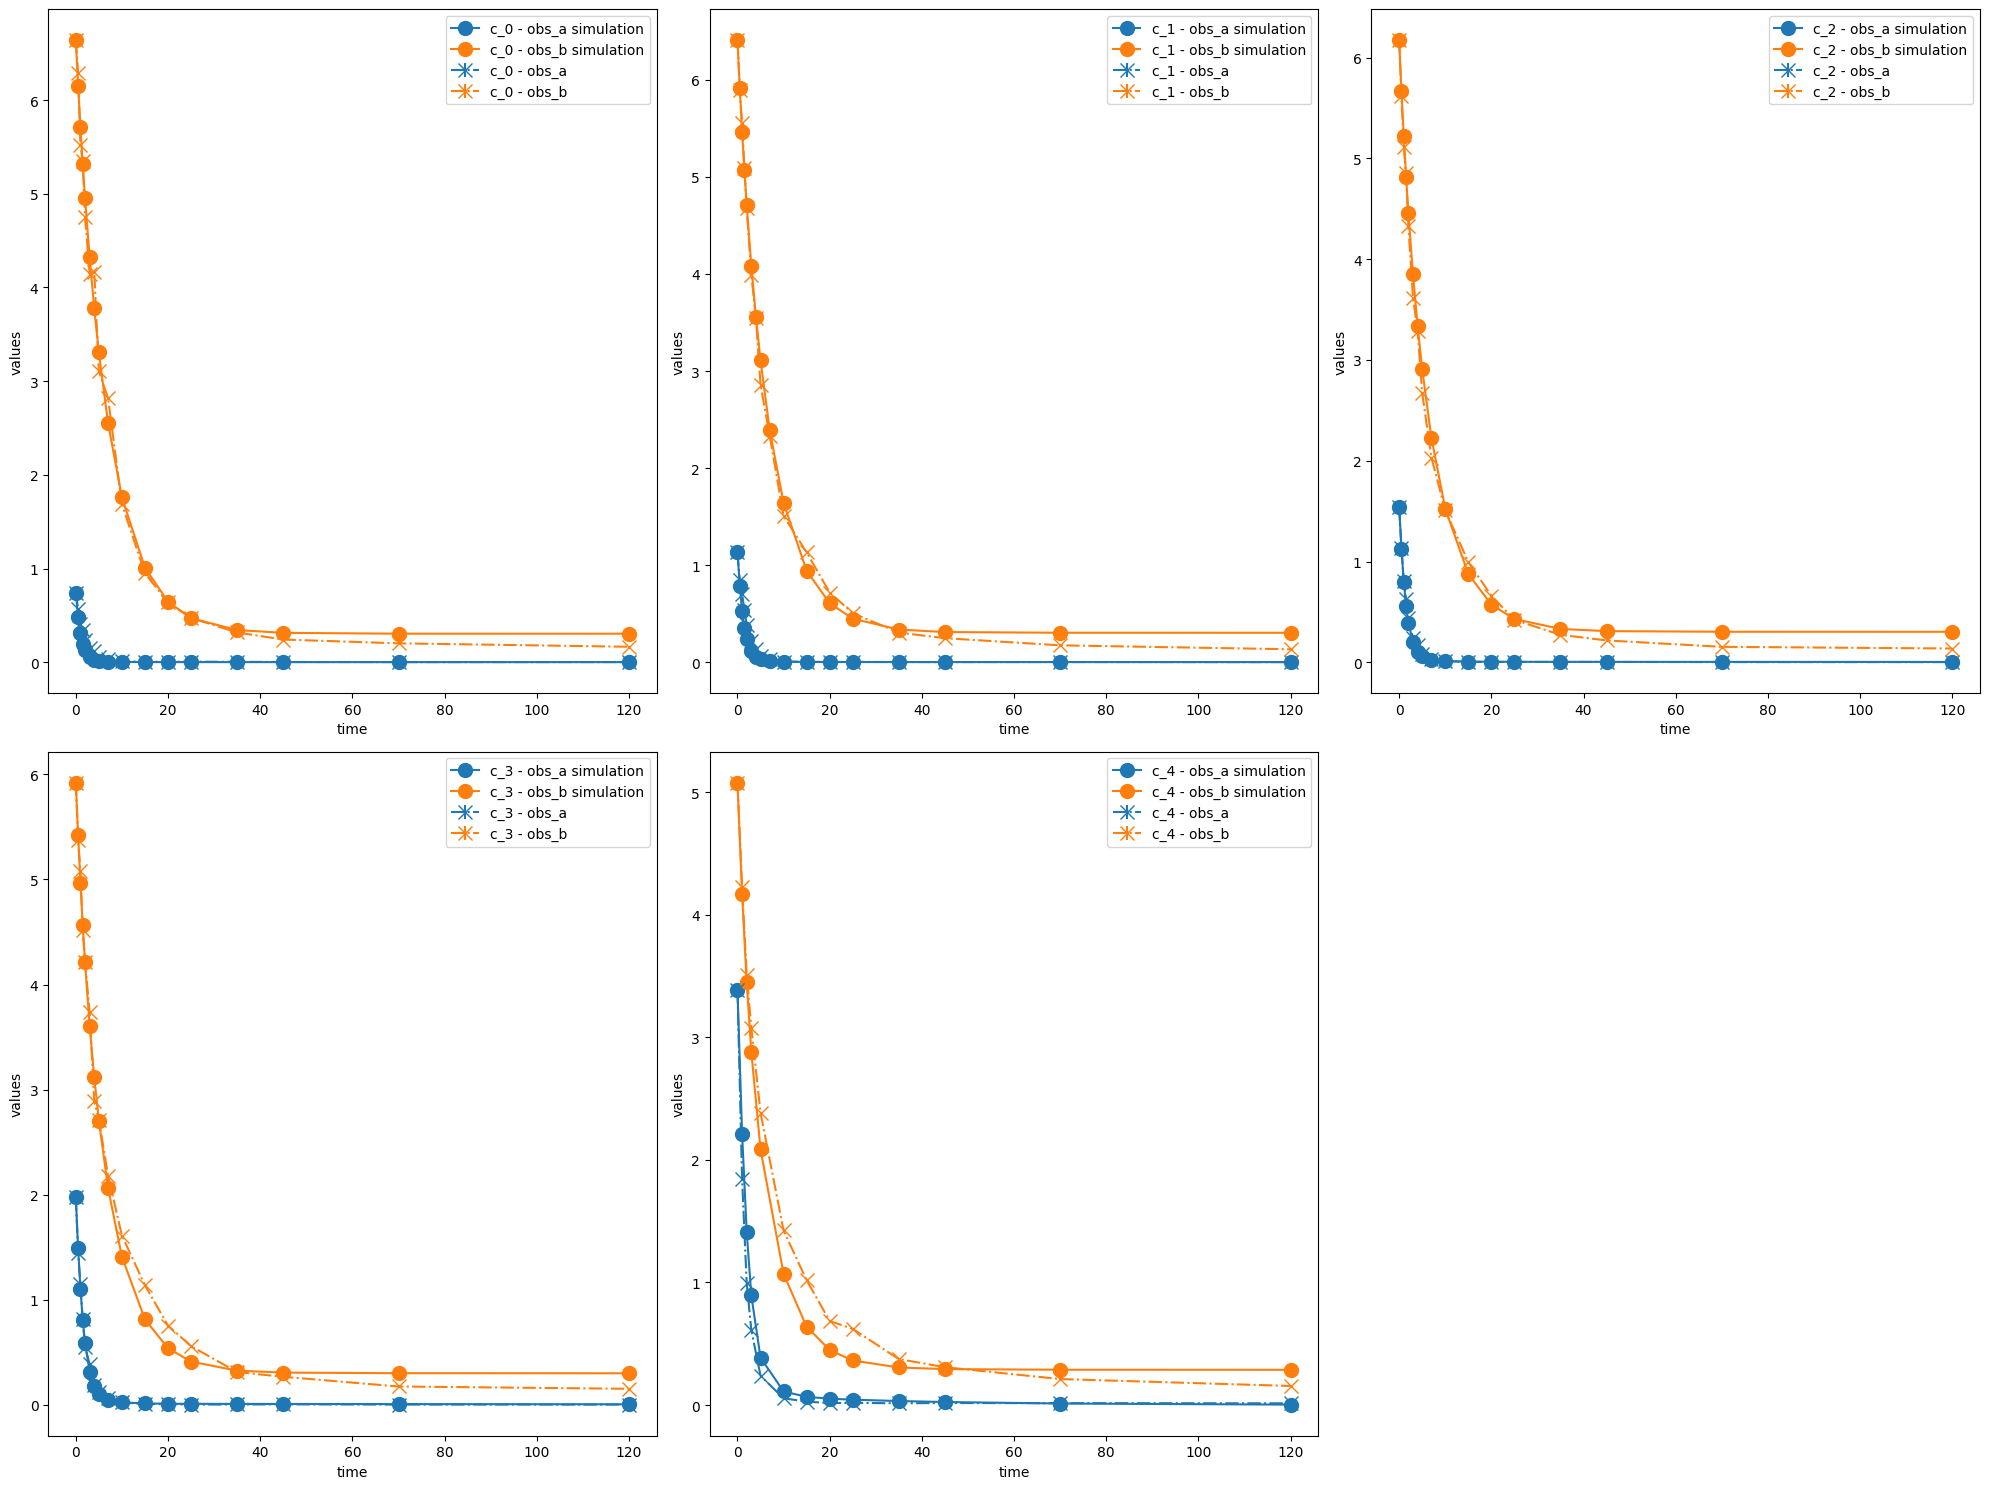

In [6]:
import pypesto.visualize.model_fit as model_fit
import matplotlib.pyplot as plt 
ax = model_fit.visualize_optimized_model_fit(
    petab_problem=petab_problem, result=result1, pypesto_problem=problem,
    group_by='simulation',
    grouping_list=[
        ["c_0"],
        ["c_1"],
        ["c_2"],
        ["c_3"],
        ["c_4"],
    ],
)

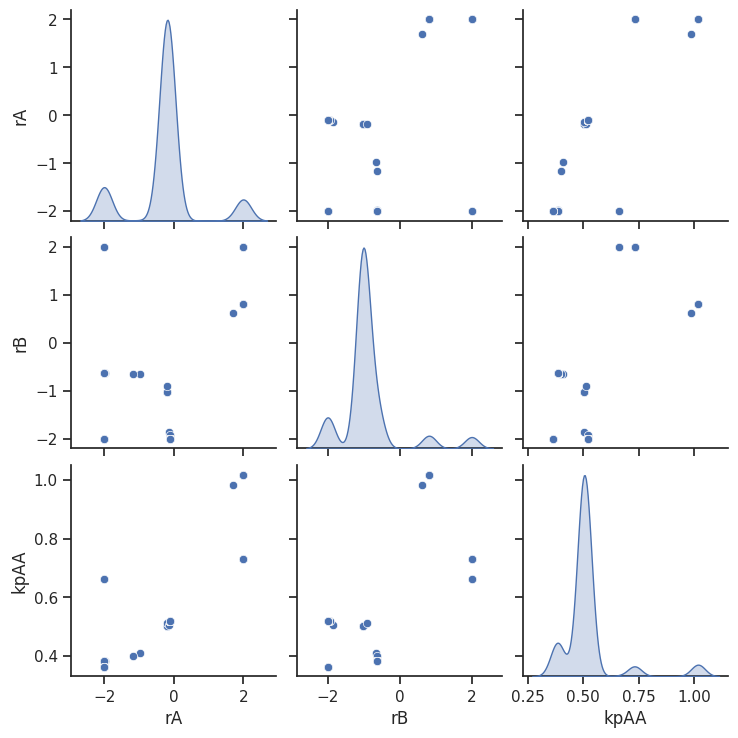

In [6]:
ax = visualize.optimization_scatter(result=result1)


In [30]:
print(result1.optimize_result.x[0])
print(10**result1.optimize_result.x[0])

[-0.19278464 -1.01314135  0.          0.          0.          0.
  0.          0.50269938]
[0.64152763 0.09701941 1.         1.         1.         1.
 1.         3.18199416]


In [8]:
result1.optimize_result.x[0]

array([-0.19278464, -1.01314135,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.50269938])

<Axes: title={'center': 'Waterfall plot'}, xlabel='Ordered optimizer run', ylabel='Objective value (offset=-5.521e+03)'>

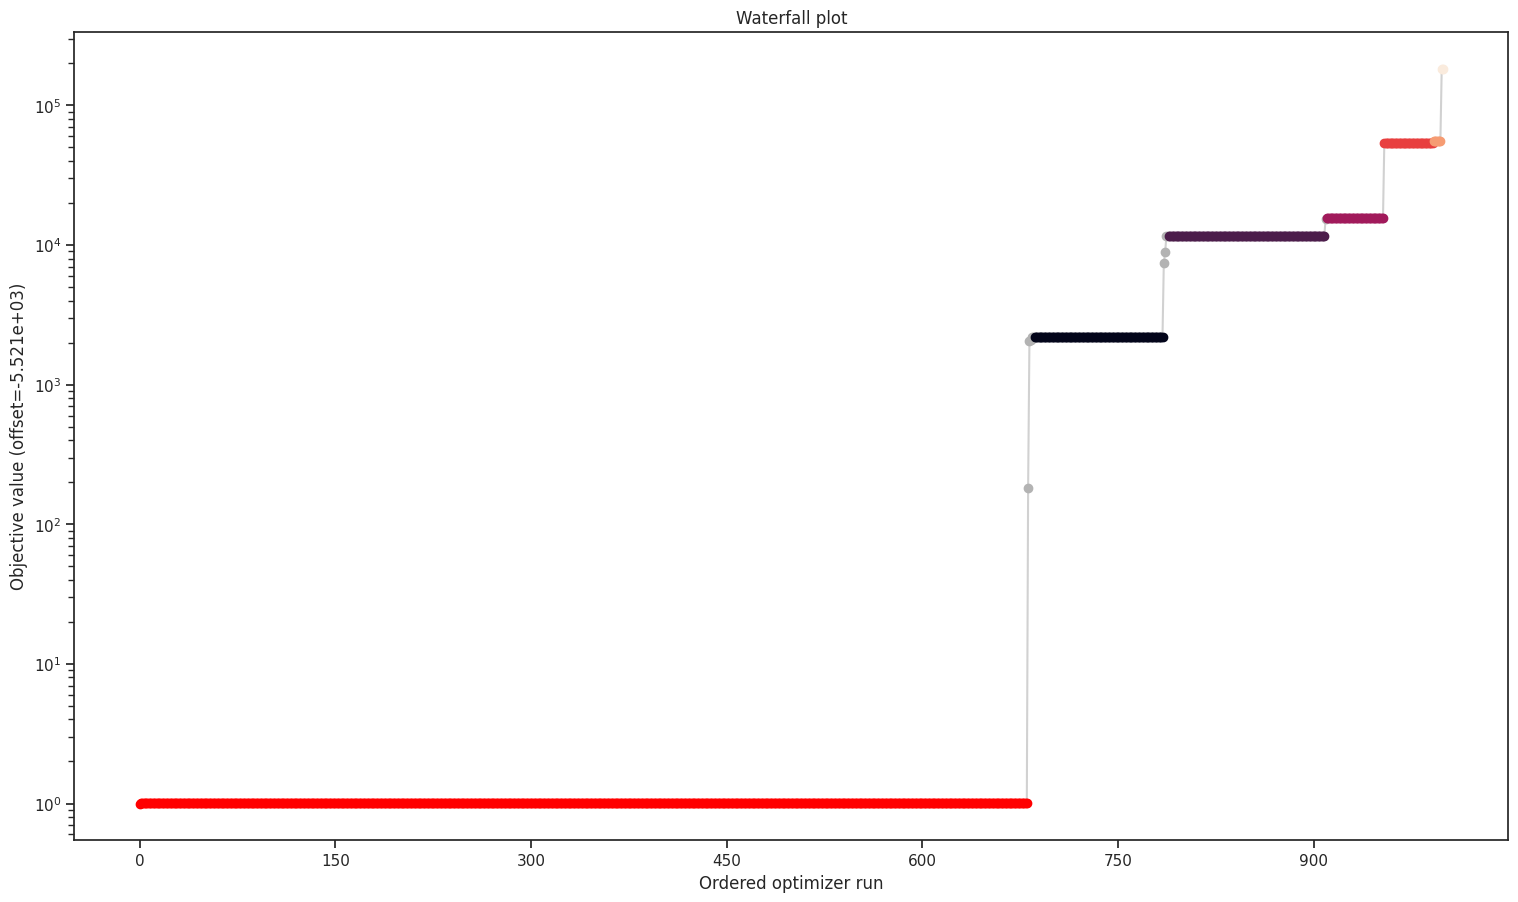

In [9]:
pypesto.visualize.waterfall(result1)

In [10]:
result1_df = result1.optimize_result.as_dataframe()
# get rows where fval column is closest to minimum fval value
min_fval = result1_df['fval'].min()

result1_df.loc[np.isclose(result1_df['fval'], min_fval)]['x'].values



array([array([-0.19278464, -1.01314135,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.50269938])                         ,
       array([-0.19279618, -1.01318682,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.50269323])                         ,
       array([-0.19277864, -1.01319878,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.50269898])                         ,
       array([-0.19278171, -1.01318554,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.50269625])                         ,
       array([-0.19279599, -1.01314017,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.50269379])                         ,
       array([-0.19280159, -1.01316679,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.50269191])                         ,
       array([-0.19277771, -1.0131626 ,  0.   

In [11]:
result1_df

,id,x,fval,grad,hess,res,sres,n_fval,n_grad,n_hess,...,x0,fval0,history,exitflag,time,message,optimizer,free_indices,inner_parameters,spline_knots
0,499,"[-0.19278463725007927, -1.013141353634119, 0.0...",5522.345840,None,None,None,None,200,0,0,...,"[-1.7768792758185894, 0.9591938666598812, 0.0,...",4.092232e+05,<pypesto.history.base.CountHistory object at 0...,0,1.724681,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
1,622,"[-0.19279617702600232, -1.0131868189798348, 0....",5522.345848,None,None,None,None,180,0,0,...,"[0.3599538333669847, -0.7883300719013362, 0.0,...",7.730430e+05,<pypesto.history.base.CountHistory object at 0...,0,1.426574,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
2,922,"[-0.19277864379520526, -1.0131987757551213, 0....",5522.345848,None,None,None,None,196,0,0,...,"[1.048902917179031, -0.14025367566636815, 0.0,...",1.480316e+06,<pypesto.history.base.CountHistory object at 0...,0,1.315961,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
3,165,"[-0.19278170555254948, -1.0131855392926221, 0....",5522.345849,None,None,None,None,267,0,0,...,"[-0.7905696237578606, 0.2270165776139743, 0.0,...",1.906512e+06,<pypesto.history.base.CountHistory object at 0...,0,2.101651,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
4,865,"[-0.19279598665006983, -1.0131401684176686, 0....",5522.345849,None,None,None,None,289,0,0,...,"[-0.001213308527021173, 0.2273747325346993, 0....",8.898056e+04,<pypesto.history.base.CountHistory object at 0...,0,2.121872,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,539,"[-2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.363645...",61532.967410,None,None,None,None,1000,0,0,...,"[0.8578603438109202, -0.9735876146974274, 0.0,...",1.316217e+06,<pypesto.history.base.CountHistory object at 0...,1,8.507782,Maximum number of function evaluations has bee...,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
996,729,"[-2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.363636...",61532.967519,None,None,None,None,356,0,0,...,"[0.671903460866246, -1.0426049674653357, 0.0, ...",1.101298e+06,<pypesto.history.base.CountHistory object at 0...,0,4.021086,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
997,898,"[-2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.363595...",61532.967927,None,None,None,None,347,0,0,...,"[0.8842596611199407, -1.0126033251371607, 0.0,...",1.549229e+06,<pypesto.history.base.CountHistory object at 0...,0,2.943276,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None
998,847,"[-2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6617211...",189196.871627,None,None,None,None,328,0,0,...,"[-1.4479122805675049, 1.696690902410642, 0.0, ...",1.833807e+06,<pypesto.history.base.CountHistory object at 0...,0,3.429847,Optimization terminated successfully.,<ScipyOptimizer method=Nelder-Mead options={'d...,"[0, 1, 7]",None,None


In [ ]:
ax = visualize.optimization_scatter(result=result1)


In [ ]:
visualize.parameters(result1)



In [ ]:
np.log10(0.5)

In [19]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), 
    n_chains=3,
)

Initializing betas with "near-exponential decay".


In [14]:
# %%capture
n_samples = 10_000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    # x0=np.array([
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     # np.log(4.5),
    #     # np.log(0.32),
    #     # np.log(1),
    #     # np.log(0.15),
    #     # np.log(1),
    # ]),
    result=result1,
    filename=None,
)
# elapsed_time = result.sample_result.time
# print(f"Elapsed time: {round(elapsed_time,2)}")

100%|█████████████████████████████████████| 10000/10000 [02:32<00:00, 65.69it/s]
Elapsed time: 152.48603393000002


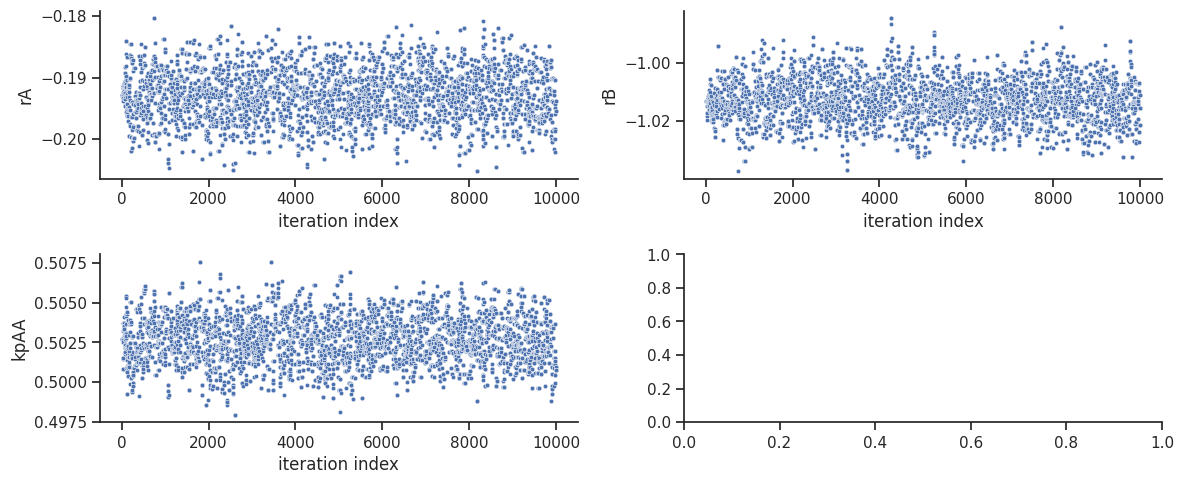

In [23]:
ax = visualize.sampling_parameter_traces(
    result1, use_problem_bounds=False, size=(12, 5),
    # par_indices=[0,1,2,3]
)

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1223: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, _ = get_data_to_plot(


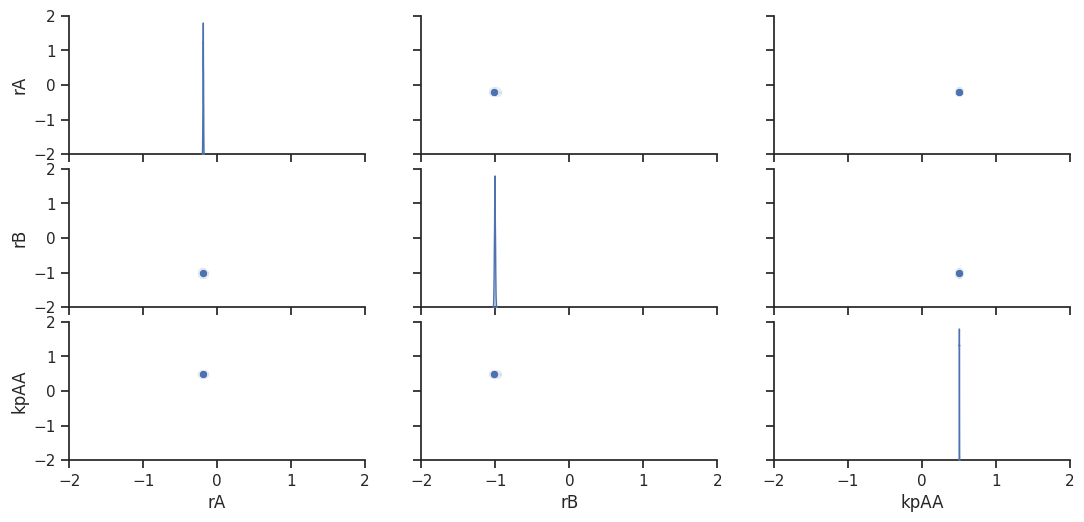

In [15]:
ax = visualize.sampling_scatter(
    result1, size=(12, 5),
    # par_indices=[0,1,2,3]
)

In [21]:
sampres = result1.sample_result
print(sampres.keys())
print(sampres['trace_x'].shape)
print(sampres['trace_neglogpost'].shape)
print(sampres['trace_neglogprior'].shape)

dict_keys(['trace_x', 'trace_neglogpost', 'trace_neglogprior', 'betas', 'burn_in', 'time', 'auto_correlation', 'effective_sample_size', 'message'])
(3, 10001, 3)
(3, 10001)
(3, 10001)


In [29]:
sampres

{'trace_x': array([[[-0.19278464, -1.01314135,  0.50269938],
         [-0.19278464, -1.01314135,  0.50269938],
         [-0.19278464, -1.01314135,  0.50269938],
         ...,
         [-0.19543362, -1.01566857,  0.50075356],
         [-0.19543362, -1.01566857,  0.50075356],
         [-0.19543362, -1.01566857,  0.50075356]],
 
        [[-0.19278464, -1.01314135,  0.50269938],
         [-0.19278464, -1.01314135,  0.50269938],
         [-0.19278464, -1.01314135,  0.50269938],
         ...,
         [-0.1494686 , -1.62628876,  0.51649358],
         [-0.1494686 , -1.62628876,  0.51649358],
         [-0.1494686 , -1.62628876,  0.51649358]],
 
        [[-0.19278464, -1.01314135,  0.50269938],
         [ 0.18851028, -0.65418219,  0.47791097],
         [ 0.18851028, -0.65418219,  0.47791097],
         ...,
         [ 0.55080723,  0.47510252,  0.84895063],
         [-1.00725589,  0.20403238,  0.72550929],
         [-1.00725589,  0.20403238,  0.72550929]]]),
 'trace_neglogpost': array([[ 5522.345

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1293: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


array([[<Axes: xlabel='rA', ylabel='Density'>,
        <Axes: xlabel='rB', ylabel='Density'>],
       [<Axes: xlabel='kpAA', ylabel='Density'>, <Axes: >]], dtype=object)

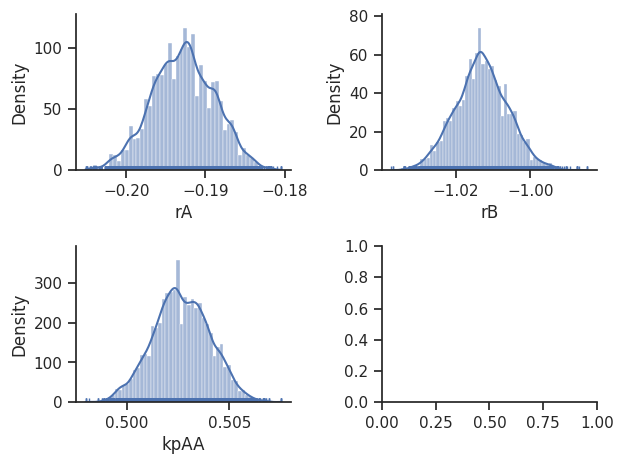

In [16]:
visualize.sampling_1d_marginals(result1)

Geweke burn-in index: 0
Geweke burn-in index: 0


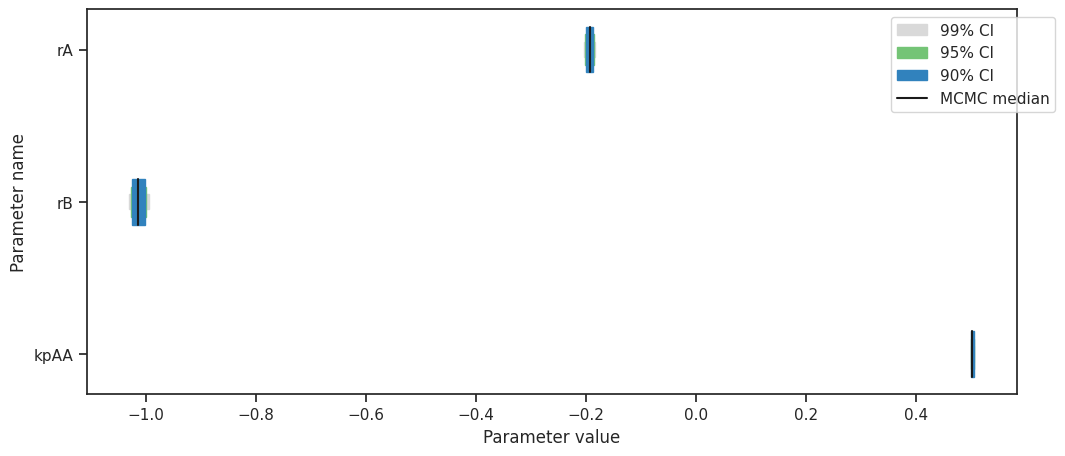

In [ ]:
ax = visualize.sampling_parameter_cis(
    result, size=(12, 5),
    
    alpha=[99, 95, 90]
    
    # par_indices=[0,1,2,3]
)

In [ ]:
np.exp(sample.calculate_ci_mcmc_sample(result1, ci_level=0.95))

In [ ]:
np.exp(sample.calculate_ci_mcmc_sample(result1, ci_level=0.95))

In [ ]:
ax = visualize.sampling_parameter_traces(
    result1, use_problem_bounds=False, size=(12, 5),
    # par_indices=[0,1,2,3]
)

# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")

# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# # ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][2].plot([0, n_samples], np.log([kp_kt_ratio_true, kp_kt_ratio_true]), "k--")
# ax[2][0].plot([0, n_samples], np.log([kd_kt_true, kd_kt_true]), "k--")


In [ ]:
it_start = sample.geweke_test(result=result)
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5),
    par_indices=[0,1,2,3]
)
ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[0][0].plot([it_start, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([it_start, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[0][2].plot([it_start, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([it_start, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[1][1].plot([it_start, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][2].plot([it_start, n_samples], np.log([kp_kt_ratio_true, kp_kt_ratio_true]), "k--")
# ax[2][0].plot([it_start, n_samples], np.log([kd_kt_true, kd_kt_true]), "k--")

In [ ]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=True, full_trace=True, size=(10, 4),
    par_indices=[0,1,2,3]
)
# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([kt_true, kt_true]), "k--")

In [ ]:
alpha = [99, 95, 90]
import matplotlib.pyplot as plt
ax = visualize.sampling_parameter_cis(result, alpha=alpha, size=(10, 5))
line1, = ax.plot([np.log(rA_true)], 0, 'o', color='tab:red')
line2, = ax.plot([np.log(rB_true)], 1, 'o', color='tab:red')
line3, = ax.plot([np.log(rX_true)], 2, 'o', color='tab:red')
line4, = ax.plot([np.log(KBB_true)], 3, 'o', color='tab:red')
line5, = ax.plot([np.log(kpAA_true)], 4, 'o', color='tab:red')
line6, = ax.plot([np.log(kp_kt_ratio_true)], 5, 'o', color='tab:red')
line7, = ax.plot([np.log(kd_kt_true)], 6, 'o', color='tab:red')
# line4, = ax.plot([np.log(kpAA_true)], 3, 'o', color='tab:red')
# line5, = ax.plot([np.log(kt_true)], 4, 'o', color='tab:red')

# ax.legend()
# Get existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

unique_handles_labels = list(dict(zip(labels, handles)).items())
unique_labels, unique_handles = zip(*unique_handles_labels)

# Update the legend with unique handles and labels
ax.legend(unique_handles, unique_labels)
ax.set_yticks([0,1,2,3,4,5,6],['$r_{A}$', '$r_{B}$', '$r_{X}$', '$K_{BB}$', '$k_{pAA}$', '${k_{pAA}}{k_{t}}^{-1}$', '${k_{d}}{k_{t}}$'])
ax.set_xlabel('parameter value')
ax.set_ylabel('')
# ax.set_xlim(-5, 5)
plt.show()
# ax.vlines(np.log([k1_true, k2_true]), 0, 1, color="k", linestyle="--")

In [ ]:
np.exp(sample.calculate_ci_mcmc_sample(result1, ci_level=0.6827))

In [ ]:
for i_chain in range(len(result.sample_result.betas)):
    ax = visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}"
    )
    
    y_max_00 = ax[0][0].get_ylim()[1]
    y_max_01 = ax[0][1].get_ylim()[1]
    y_max_02 = ax[0][2].get_ylim()[1]
    y_max_10 = ax[1][0].get_ylim()[1]
    y_max_11 = ax[1][1].get_ylim()[1]
    y_max_12 = ax[1][2].get_ylim()[1]
    y_max_20 = ax[2][0].get_ylim()[1]
    
    ax[0][0].vlines(np.log(rA_true),   0, y_max_00, color="tab:red", linestyle="--")
    ax[0][1].vlines(np.log(rB_true),   0, y_max_01, color="tab:red", linestyle="--")
    ax[0][2].vlines(np.log(rX_true),   0, y_max_02, color="tab:red", linestyle="--")
    ax[1][0].vlines(np.log(KBB_true),  0, y_max_10, color="tab:red", linestyle="--")
    ax[1][1].vlines(np.log(kpAA_true), 0, y_max_11, color="tab:red", linestyle="--")
    ax[1][2].vlines(np.log(kp_kt_ratio_true), 0, y_max_12, color="tab:red", linestyle="--")
    ax[2][0].vlines(np.log(kd_kt_true), 0, y_max_20, color="tab:red", linestyle="--")

In [ ]:
# kAA, kAB, kAC
# kBA, kBB, kBC
# kCA, kCB, kCC


# rAA = kAA / kAA = 1
# rAB = kAA / kAB
# rAC = kAA / kAC

# rBA = kBB / kBA
# rBB = kBB / kBB = 1
# rBC = kBB / kBC

# rCA = kCC / kCA
# rCB = kCC / kCB
# rCC = kCC / kCC = 1


In [ ]:
from pypesto.C import AMICI_STATUS, AMICI_T, AMICI_X, AMICI_Y
from pypesto.predict import AmiciPredictor


# This post_processor will transform the output of the simulation tool
# such that the output is compatible with the next steps.
def post_processor(amici_outputs, output_type, output_ids):
    outputs = [
        (
            amici_output[output_type]
            if amici_output[AMICI_STATUS] == 0
            else np.full((len(amici_output[AMICI_T]), len(output_ids)), np.nan)
        )
        for amici_output in amici_outputs
    ]
    return outputs


# Setup post-processors for both states and observables.
from functools import partial

amici_objective = result.problem.objective
state_ids = amici_objective.amici_model.getStateIds()
observable_ids = amici_objective.amici_model.getObservableIds()
post_processor_x = partial(
    post_processor,
    output_type=AMICI_X,
    output_ids=state_ids,
)
post_processor_y = partial(
    post_processor,
    output_type=AMICI_Y,
    output_ids=observable_ids,
)

# Create pyPESTO predictors for states and observables
predictor_x = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_x,
    output_ids=state_ids,
)
predictor_y = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_y,
    output_ids=observable_ids,
)

from pypesto.C import EnsembleType
from pypesto.ensemble import Ensemble

# corresponds to only the estimated parameters
x_names = result.problem.get_reduced_vector(result.problem.x_names)

# Create the ensemble with the MCMC chain from parallel tempering with the real temperature.
ensemble = Ensemble.from_sample(
    result,
    chain_slice=slice(
        None, None, 5
    ),  # Optional argument: only use every fifth vector in the chain.
    x_names=x_names,
    ensemble_type=EnsembleType.sample,
    lower_bound=result.problem.lb,
    upper_bound=result.problem.ub,
)

In [ ]:
from pypesto.engine import MultiProcessEngine

engine = MultiProcessEngine()

ensemble_prediction = ensemble.predict(
    predictor_x, prediction_id=AMICI_X, engine=engine
)
from pypesto.C import CONDITION, OUTPUT

credibility_interval_levels = [90, 95, 99]

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(10, 5),
    # labels={"A": "state_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=CONDITION,
    # condition_ids=["condition_0", "condition_1", "condition_2"],  # `None` for all conditions
    # output_ids=["A", "B"],  # `None` for all outputs
)

In [ ]:
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(20, 10),
    # labels={"A": "obs_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=OUTPUT,
)

In [ ]:
from petab.v1.C import PARAMETER_ID, PARAMETER_SCALE, LOWER_BOUND, UPPER_BOUND, NOMINAL_VALUE, ESTIMATE, OBSERVABLE_ID, SIMULATION_CONDITION_ID, TIME, MEASUREMENT, OBSERVABLE_FORMULA, NOISE_FORMULA, LOG, CONDITION_ID, CONDITION_NAME, FORMAT_VERSION, PARAMETER_FILE, PROBLEMS, SBML_FILES, CONDITION_FILES, MEASUREMENT_FILES, OBSERVABLE_FILES
def show_measurement_fit(petab_problem, engine):


    mdf = petab_problem.measurement_df
    # Create a custom objective with new output timepoints.
    conditions = mdf[SIMULATION_CONDITION_ID].unique()
    # timepoints = [mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique() for c in conditions]
    # timepoints = [mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique() for c in conditions]
    # timepoints = [np.array([5.04038772,10.08077544,29.8546042 ,60.09693053,119.80613893, 240.38772213])]
    # print(timepoints)
    # timepoints = np.arange(min(timepoints[0]), max(timepoints), 0.1)
    # print(timepoints)
    # amici_objective_custom = amici_objective.set_custom_timepoints(
    #     timepoints=timepoints
    # )

    # Create an observable predictor with the custom objective.
    predictor_y_custom = AmiciPredictor(
        amici_objective,
        post_processor=post_processor_y,
        output_ids=observable_ids,
        condition_ids=[edata.id for edata in amici_objective.edatas],
    )

    # Predict then plot.
    ensemble_prediction = ensemble.predict(
        predictor_y_custom, prediction_id=AMICI_Y, engine=engine
    )

    ax = visualize.sampling_prediction_trajectories(
        ensemble_prediction,
        levels=credibility_interval_levels,
        groupby=CONDITION,
        measurement_df=mdf,
        size=(12,6),
    )
    
    return ax
# import matplotlib.pyplot as plt
# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# # ax[1][1].set_title('')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

ax = show_measurement_fit(petab_problem, engine)
plt.tight_layout()
fig = ax[0][0].get_figure()
fig.savefig('FRP2_measurement_fit.png')
plt.show()

In [ ]:
from petab.v1.C import PARAMETER_ID, PARAMETER_SCALE, LOWER_BOUND, UPPER_BOUND, NOMINAL_VALUE, ESTIMATE, OBSERVABLE_ID, SIMULATION_CONDITION_ID, TIME, MEASUREMENT, OBSERVABLE_FORMULA, NOISE_FORMULA, LOG, CONDITION_ID, CONDITION_NAME, FORMAT_VERSION, PARAMETER_FILE, PROBLEMS, SBML_FILES, CONDITION_FILES, MEASUREMENT_FILES, OBSERVABLE_FILES
mdf = petab_problem.measurement_df
mdf

# count the number of observables in mdf


# get the timepoints for each condition


# for c in conditions:
#     timepoints = mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique()
#     print(timepoints)
    
# Convert into list comprehension

print(timepoints)

In [ ]:
mdf

In [ ]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    groupby=CONDITION,
    measurement_df=mdf,
    # axes=ax,
)
# plt.tight_layout()

# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# ax[1][1].set_title('')
# ax[0].set_ylim([-0.1, 2.5])
# ax[1].set_ylim([-0.1, 2.5])
# ax[2].set_ylim([-0.1, 2.5])
# # fig.set_title('')
# ax[0].set_xlabel('Time (s)')
# ax[1].set_xlabel('Time (s)')
# ax[2].set_xlabel('Time (s)')
# ax[0].set_ylabel('Simulated Concentration (M)')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

plt.show()

mdf